In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt

# **SMOTE**

In [27]:
data = pd.read_csv('Otherdata/bank-additional-full.csv', sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [28]:
duplicates = data.duplicated()
true_count = duplicates.sum()
print('Number of duplicate rows = ', true_count)
data = data.drop_duplicates()
data

Number of duplicate rows =  12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [29]:
# # Encode categorical variables using pd.get_dummies
# data_encoded = pd.get_dummies(data, drop_first=True)

# # Separate features and target variable
# X = data_encoded.drop('y_yes', axis=1)
# y = data_encoded['y_yes']

# # Check the balance before applying SMOTE
# balance_before = y.value_counts()

# balance_before

In [30]:
# from imblearn.over_sampling import SMOTE

# # Assuming X and y are defined as shown previously
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # To check the balance after applying SMOTE
# balance_after = y_resampled.value_counts()
# print(balance_after)


In [31]:
data_no = data[data['y'] == 'no']
data_yes = data[data['y'] == 'yes']


##  **Persona Yes RF**

### **Persona 1**

In [32]:
from datetime import datetime
import pandas as pd

print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Load and preprocess data
data = pd.read_csv('Otherdata/bank-additional-full.csv', delimiter=';')

# Define categorical features according to cluster's most frequent categories
data['job_retired'] = (data['job'] == 'retired').astype(int)
data['education_basic.4y'] = (data['education'] == 'basic.4y').astype(int)
data['marital_married'] = (data['marital'] == 'married').astype(int)
data['housing_yes'] = (data['housing'] == 'yes').astype(int)
data['loan_no'] = (data['loan'] == 'no').astype(int)

# Define continuous features
data['age'] = data['age'].astype(float)  # Ensure age is a float
# data['cons.price.idx'] = data['cons.price.idx'].astype(float)
data['campaign'] = data['campaign'].astype(float)

# Define the target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})  # Ensure binary encoding

# Specific predictors from the cluster
predictors = [
    'age', 'campaign', 'job_retired', 'education_basic.4y', 
    'marital_married', 'housing_yes', 'loan_no'
]

# Select specific predictors for X and y
X = data[predictors]
y = data['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['age','campaign']])
X_test_scaled = scaler.transform(X_test[['age','campaign']])

# Replace the original columns with the scaled ones
X_train[['age', 'campaign']] = X_train_scaled
X_test[['age', 'campaign']] = X_test_scaled

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': [2, 3],  # Updated to the number of numerical features used
    'classifier__max_depth': [4, 6, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a pipeline that first applies SMOTE then fits a RandomForest classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    scoring="accuracy",
                    verbose=1, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
# After fitting the GridSearchCV object
best_rf = grid.best_estimator_.named_steps['classifier']

# Extracting feature importances
importances = best_rf.feature_importances_

# Mapping feature names to their importances
feature_importance_dict = {feature: importance for feature, importance in zip(predictors, importances)}

# Sorting features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying the feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    
print("End search time:", datetime.now())




Start search time: 2024-04-22 12:50:44.317972


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__max_features': 3, 'classifier__n_estimators': 200}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        max_features=3, n_estimators=200,
                                        random_state=10))])
age: 0.5700531215744814
campaign: 0.25488063615375217
job_retired: 0.07038316586151341
marital_married: 0.0574920937705274
education_basic.4y: 0.04402168239567828
housing_yes: 0.0020292053178847503
loan_no: 0.0011400949261626383
End search time: 2024-04-22 12:52:33.175136



Accuracy: 0.739147324463436


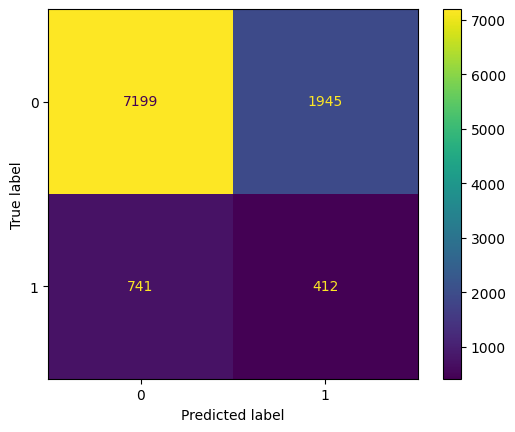

In [33]:
from sklearn import metrics

# Assuming final_model_rf is the best estimator from the GridSearchCV
final_model_rf = grid.best_estimator_

# Predict on the test set. Since X_test is already defined and preprocessed, we use it directly.
y_pred = final_model_rf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()


### **Persona 2**

In [34]:
from datetime import datetime
import pandas as pd

print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Load and preprocess data
data = pd.read_csv('Otherdata/bank-additional-full.csv', delimiter=';')

# Define categorical features according to cluster's most frequent categories
data['job_admin'] = (data['job'] == 'admin.').astype(int)
data['education_university.degree'] = (data['education'] == 'university.degree').astype(int)
data['marital_single'] = (data['marital'] == 'single').astype(int)
data['housing_yes'] = (data['housing'] == 'yes').astype(int)
data['loan_no'] = (data['loan'] == 'no').astype(int)

# Define continuous features
data['age'] = data['age'].astype(float)  # Ensure age is a float
# data['cons.price.idx'] = data['cons.price.idx'].astype(float)
data['campaign'] = data['campaign'].astype(float)

# Define the target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})  # Ensure binary encoding

# Specific predictors from the cluster
predictors = [
    'age', 'campaign', 'job_admin', 'education_university.degree', 
    'marital_single', 'housing_yes', 'loan_no'
]

# Select specific predictors for X and y
X = data[predictors]
y = data['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['age', 'campaign']])
X_test_scaled = scaler.transform(X_test[['age', 'campaign']])

# Replace the original columns with the scaled ones
X_train[['age', 'campaign']] = X_train_scaled
X_test[['age', 'campaign']] = X_test_scaled

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': [2, 3],  # Updated to the number of numerical features used
    'classifier__max_depth': [4, 6, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a pipeline that first applies SMOTE then fits a RandomForest classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    scoring="accuracy",
                    verbose=1, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
# After fitting the GridSearchCV object
best_rf = grid.best_estimator_.named_steps['classifier']

# Extracting feature importances
importances = best_rf.feature_importances_

# Mapping feature names to their importances
feature_importance_dict = {feature: importance for feature, importance in zip(predictors, importances)}

# Sorting features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying the feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
print("End search time:", datetime.now())

Start search time: 2024-04-22 12:52:33.572934
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': 3, 'classifier__n_estimators': 300}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, max_features=3,
                                        n_estimators=300, random_state=10))])
age: 0.5083138554681862
campaign: 0.33006239276338356
marital_single: 0.05988155549584099
education_university.degree: 0.05488192901984168
job_admin: 0.024331590468830842
housing_yes: 0.01169393684559466
loan_no: 0.010834739938322279
End search time: 2024-04-22 12:54:28.243322



Accuracy: 0.6887442944546955


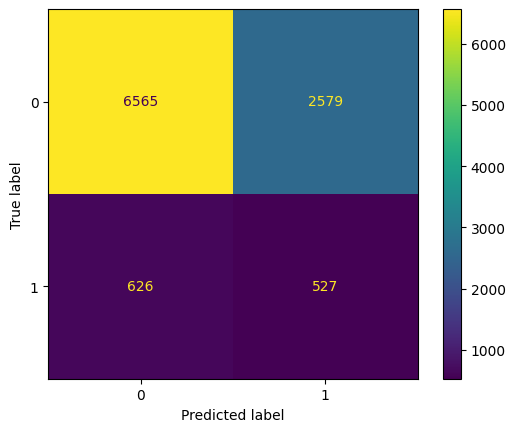

In [35]:
from sklearn import metrics

# Assuming final_model_rf is the best estimator from the GridSearchCV
final_model_rf = grid.best_estimator_

# Predict on the test set. Since X_test is already defined and preprocessed, we use it directly.
y_pred = final_model_rf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## **Persona No RF**

### **Persona 1**

In [36]:
from datetime import datetime
import pandas as pd

print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Load and preprocess data
data = pd.read_csv('Otherdata/bank-additional-full.csv', delimiter=';')

# Define categorical features according to cluster's most frequent categories
data['job_blue-collar'] = (data['job'] == 'blue-collar').astype(int)
data['education_high.school'] = (data['education'] == 'high.school').astype(int)
data['marital_married'] = (data['marital'] == 'married').astype(int)
data['housing_no'] = (data['housing'] == 'no').astype(int)
data['loan_no'] = (data['loan'] == 'no').astype(int)

# Define continuous features
data['age'] = data['age'].astype(float)  # Ensure age is a float
# data['cons.price.idx'] = data['cons.price.idx'].astype(float)
data['campaign'] = data['campaign'].astype(float)

# Define the target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})  # Ensure binary encoding

# Specific predictors from the cluster
predictors = [
    'age', 'campaign', 'job_blue-collar', 'education_high.school', 
    'marital_married', 'housing_no', 'loan_no'
]

# Select specific predictors for X and y
X = data[predictors]
y = data['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['age', 'campaign']])
X_test_scaled = scaler.transform(X_test[['age', 'campaign']])

# Replace the original columns with the scaled ones
X_train[['age', 'campaign']] = X_train_scaled
X_test[['age', 'campaign']] = X_test_scaled

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': [2, 3],  # Updated to the number of numerical features used
    'classifier__max_depth': [4, 6, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a pipeline that first applies SMOTE then fits a RandomForest classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    scoring="accuracy",
                    verbose=1, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
# After fitting the GridSearchCV object
best_rf = grid.best_estimator_.named_steps['classifier']

# Extracting feature importances
importances = best_rf.feature_importances_

# Mapping feature names to their importances
feature_importance_dict = {feature: importance for feature, importance in zip(predictors, importances)}

# Sorting features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying the feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    
print("End search time:", datetime.now())

Start search time: 2024-04-22 12:54:28.696695
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': 3, 'classifier__n_estimators': 200}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, max_features=3,
                                        n_estimators=200, random_state=10))])
age: 0.4999783279672277
campaign: 0.31397282643827296
job_blue-collar: 0.10045904577891197
marital_married: 0.04194502234072323
education_high.school: 0.02118867995104987
housing_no: 0.012540913226504139
loan_no: 0.009915184297310102
End search time: 2024-04-22 12:56:17.190933



Accuracy: 0.7012722152083131


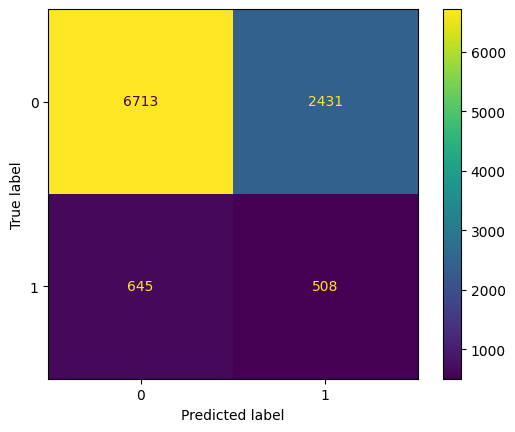

In [37]:
from sklearn import metrics

# Assuming final_model_rf is the best estimator from the GridSearchCV
final_model_rf = grid.best_estimator_

# Predict on the test set. Since X_test is already defined and preprocessed, we use it directly.
y_pred = final_model_rf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### **Persona 2**

In [38]:
from datetime import datetime
import pandas as pd

print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Load and preprocess data
data = pd.read_csv('Otherdata/bank-additional-full.csv', delimiter=';')

# Define categorical features according to cluster's most frequent categories
data['job_blue-collar'] = (data['job'] == 'blue-collar').astype(int)
data['education_university.degree'] = (data['education'] == 'university.degree').astype(int)
data['marital_married'] = (data['marital'] == 'married').astype(int)
data['housing_yes'] = (data['housing'] == 'yes').astype(int)
data['loan_no'] = (data['loan'] == 'no').astype(int)

# Define continuous features
data['age'] = data['age'].astype(float)  # Ensure age is a float
# data['cons.price.idx'] = data['cons.price.idx'].astype(float)
data['campaign'] = data['campaign'].astype(float)

# Define the target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})  # Ensure binary encoding

# Specific predictors from the cluster
predictors = [
    'age', 'campaign', 'job_blue-collar', 'education_university.degree', 
    'marital_married', 'housing_yes', 'loan_no'
]

# Select specific predictors for X and y
X = data[predictors]
y = data['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['age', 'campaign']])
X_test_scaled = scaler.transform(X_test[['age', 'campaign']])

# Replace the original columns with the scaled ones
X_train[['age', 'campaign']] = X_train_scaled
X_test[['age', 'campaign']] = X_test_scaled

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': [2, 3],  # Updated to the number of numerical features used
    'classifier__max_depth': [4, 6, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a pipeline that first applies SMOTE then fits a RandomForest classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    scoring="accuracy",
                    verbose=1, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
# After fitting the GridSearchCV object
best_rf = grid.best_estimator_.named_steps['classifier']

# Extracting feature importances
importances = best_rf.feature_importances_

# Mapping feature names to their importances
feature_importance_dict = {feature: importance for feature, importance in zip(predictors, importances)}

# Sorting features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying the feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    
print("End search time:", datetime.now())

Start search time: 2024-04-22 12:56:17.581701
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': 3, 'classifier__n_estimators': 200}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, max_features=3,
                                        n_estimators=200, random_state=10))])
age: 0.4865164548337395
campaign: 0.3237630984111826
job_blue-collar: 0.08606172204636778
education_university.degree: 0.044001806345850145
marital_married: 0.03679919970130302
housing_yes: 0.012259088783502244
loan_no: 0.010598629878054681
End search time: 2024-04-22 12:58:16.987299



Accuracy: 0.6961250849762066


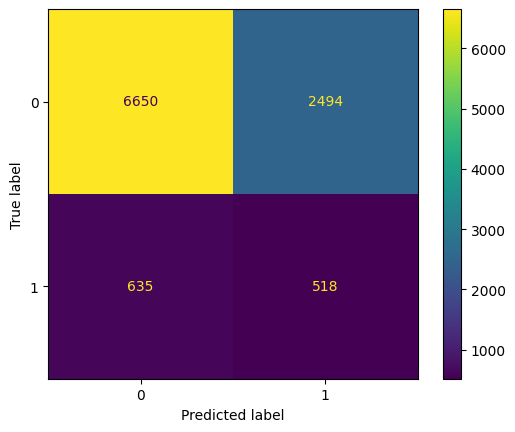

In [39]:
from sklearn import metrics

# Assuming final_model_rf is the best estimator from the GridSearchCV
final_model_rf = grid.best_estimator_

# Predict on the test set. Since X_test is already defined and preprocessed, we use it directly.
y_pred = final_model_rf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## **Old Persona 1 SVM**

In [40]:
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Load and preprocess data
data = pd.read_csv('bank-additional-full.csv', delimiter=';')  # Update with the correct path
data_encoded = pd.get_dummies(data, drop_first=True)

# Select specific predictors and target
predictors = ['marital_married', 'job_self-employed', 'education_university.degree', 'loan_yes', 'age', 'housing_yes']
X = data_encoded[predictors]
y = data_encoded['y_yes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SVM Tuning parameters
param = {
    'classifier__C': [.00001, .0001, .001, 0.01],
    'classifier__gamma': [.00001, .0001, .001, .01],  # 1/n_features
    'classifier__kernel': ['rbf', 'linear']
}

# Create a pipeline that first applies SMOTE then fits an SVM classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param,
                    verbose=3, cv=3,
                    n_jobs=-1,
                    refit=True)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)

print("End search time:", datetime.now())


Start search time: 2024-04-22 12:58:17.372760


FileNotFoundError: [Errno 2] No such file or directory: 'bank-additional-full.csv'

Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=1e-05, gamma=0.0001, random_state=10))])

Accuracy: 0.8886083325240361


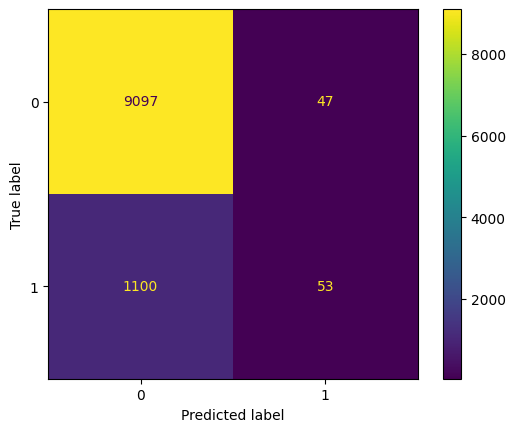

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming final_model_svm is the best estimator from the GridSearchCV
final_model_svm = grid.best_estimator_

# Adjust the variable names for consistency
y_pred = final_model_svm.predict(X_test)  # Use X_test instead of X_test_JB

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)  # Use y_test instead of y_test_JB
print("Best estimator:", grid.best_estimator_)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # Use y_test instead of y_test_JB
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()  # Display the confusion matrix plot


## **Old Persona 2 SVM**

In [ ]:
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Load and preprocess data
data = pd.read_csv('bank-additional-full.csv', delimiter=';')  # Update with the correct path
data_encoded = pd.get_dummies(data, drop_first=True)

# Select specific predictors and target
predictors = ['marital_single', 'job_blue-collar', 'education_high.school', 'loan_unknown', 'age', 'housing_unknown']
X = data_encoded[predictors]
y = data_encoded['y_yes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SVM Tuning parameters
param = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.1, 1, 10, 100],  # 1/n_features
    'classifier__kernel': ['rbf', 'linear']
}

# Create a pipeline that first applies SMOTE then fits an SVM classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param,
                    verbose=3, cv=3,
                    n_jobs=-1,
                    refit=True)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)

print("End search time:", datetime.now())


Start search time: 2024-04-01 19:57:23.077103
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=0.1, gamma=0.1, random_state=10))])
End search time: 2024-04-01 20:27:24.411900


Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=0.1, gamma=0.1, random_state=10))])

Accuracy: 0.7174905312226862


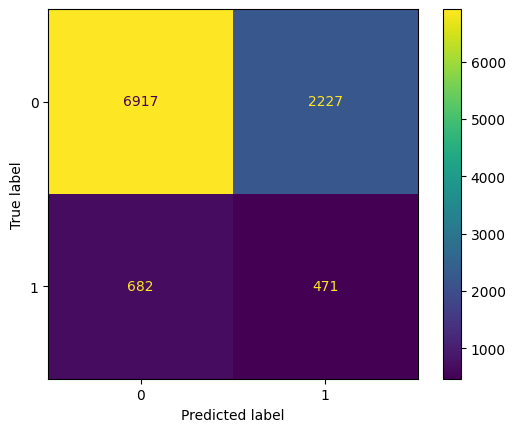

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming final_model_svm is the best estimator from the GridSearchCV
final_model_svm = grid.best_estimator_

# Adjust the variable names for consistency
y_pred = final_model_svm.predict(X_test)  # Use X_test instead of X_test_JB

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)  # Use y_test instead of y_test_JB
print("Best estimator:", grid.best_estimator_)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # Use y_test instead of y_test_JB
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()  # Display the confusion matrix plot